In [1]:
#load in the data set from uci.edu (slightly different from other housing model)
housing <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

#assign column names
colnames(housing) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
                       "DIS", "RAD", "TAX", "PRATIO", "B", "LSTAT", "MDEV")
#make sure we have the right data being loaded
summary(housing)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

In [2]:
#make sure data set is in the right order for our modelling
housing <- housing[order(housing$MDEV),]

#force the random seed so we can reproduce results
set.seed(133)

#caret package has function to partition data set
library(caret)
trainingIndices <- createDataPartition(housing$MDEV, p=0.75, list=FALSE)
#break out the training vs testing data sets
housingTraining <- housing[trainingIndices,]
housingTesting <- housing[-trainingIndices,]
#note their sizes
nrow(housingTraining)
nrow(housingTesting)
#note there may be warning messages to update packages

Warning message:
"package 'caret' was built under R version 3.4.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.4.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.2"

[1] 381

[1] 125

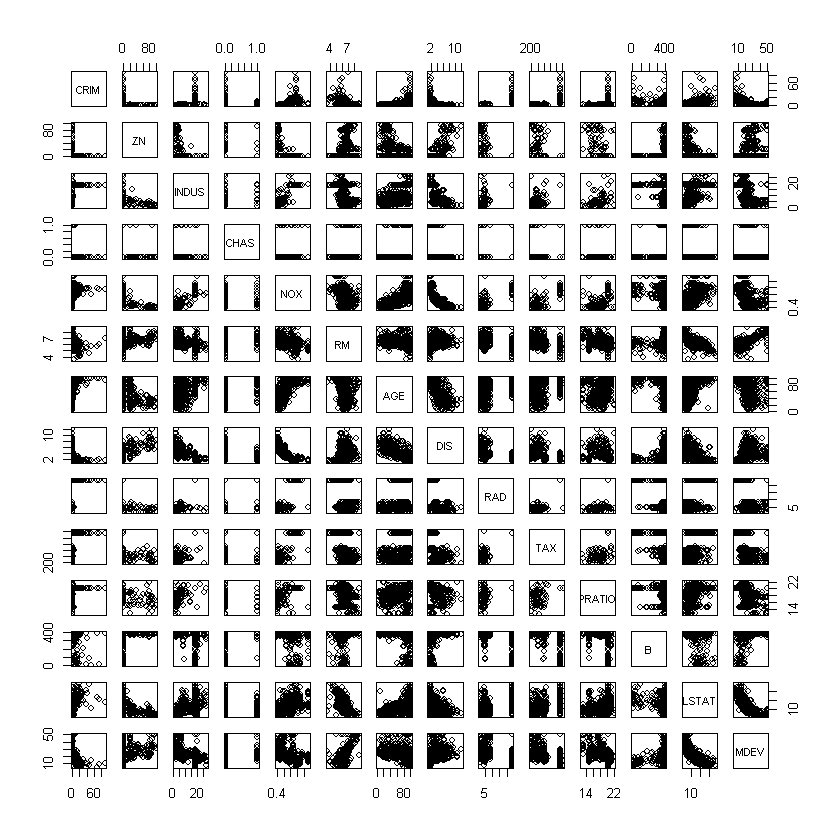

In [3]:
plot(housing)

In [4]:
#build a linear model
linearModel <- lm(MDEV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE +
                 DIS + RAD + TAX + PRATIO + B + LSTAT, data=housingTraining)
summary(linearModel)


Call:
lm(formula = MDEV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + 
    DIS + RAD + TAX + PRATIO + B + LSTAT, data = housingTraining)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8448  -2.7961  -0.5602   2.0667  25.2312 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.636334   5.929753   6.178 1.72e-09 ***
CRIM         -0.134361   0.039634  -3.390 0.000775 ***
ZN            0.041861   0.016379   2.556 0.010997 *  
INDUS         0.029561   0.068790   0.430 0.667640    
CHAS          3.046626   1.008721   3.020 0.002702 ** 
NOX         -17.620245   4.610893  -3.821 0.000156 ***
RM            3.777475   0.484884   7.790 6.92e-14 ***
AGE           0.003492   0.016413   0.213 0.831648    
DIS          -1.390157   0.235793  -5.896 8.47e-09 ***
RAD           0.309546   0.078496   3.943 9.62e-05 ***
TAX          -0.012216   0.004323  -2.826 0.004969 ** 
PRATIO       -0.998417   0.155341  -6.427 4.04e-10 ***
B             0.009745   0.0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -5.262  17.510  22.199  21.985  27.038  44.781 

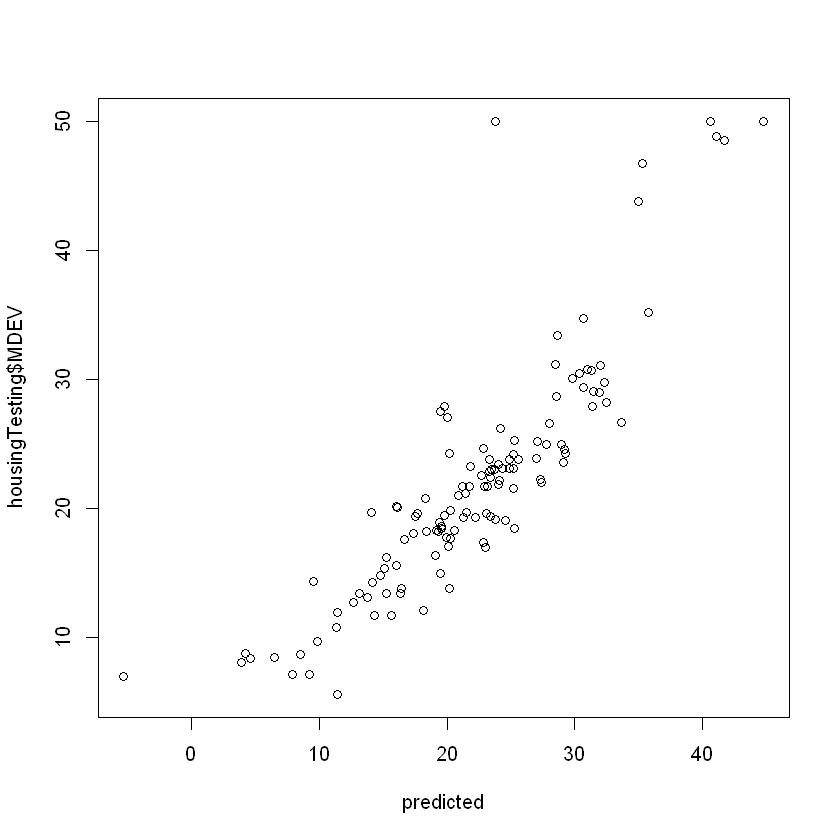

In [5]:
# now that we have a model, make a prediction
predicted <- predict(linearModel,newdata=housingTesting)
summary(predicted)

#visually compare prediction to actual
plot(predicted, housingTesting$MDEV)